##  k-최근접 이웃 회귀 모델 
#### - 분류 : 범주형 데이터를 기준으로 분류하는 방식
#### - 회귀 : 연속형 데이터(숫자)를 예측하는 방식
#### - 회귀는 정해진 볌주가 없으며, 임의의 수치값을 출력 합니다.
#### 
## K-최근접 이웃 알고리즘은 회귀에도 작동을 합니다.
#### - 작동방식
#### -분류와 유사, 예측하려는 데이터에 가장 가까운 이웃 갯수 선택
#### - 종속변수 target 데이터가 연속형데이터를 사용하여 임의 수치값 예측
#### 
## 예측값 결정 방식
#### : 최근접 이웃의 갯수가 정해지면, 이웃한 숫자값들의 '평균'을 계산하여
#### : 평균과 같거나 평균에 가장 근사한 값의 이웃 데이터가 예측값으로 결정됩니다
####  (일반 책에서 나오는 개념, 실제로는 이웃데이터의 평균값이 나온다고 보시면됩니다)
#### 그래서 임의 결과값 이라고 합니다

In [1]:
import numpy as np

perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
print(len(perch_length), len(perch_weight))
print(perch_length)
print('-------------------------------------------------------------------------------')
print(perch_weight)

# length(길이) : 특성 데이터(훈련데이터, train_data)
# weight(무게) : 정답 데이터(train_target)

56 56
[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
-------------------------------------------------------------------------------
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [3]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, '농어의 길이에 따른 무게 그래프')

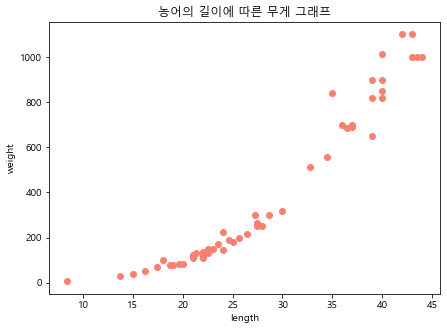

In [4]:
plt.rc('font',family = 'Malgun Gothic')
plt.figure(figsize = (7,5))
plt.scatter(perch_length,perch_weight,c='salmon')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('농어의 길이에 따른 무게 그래프')

## [해석]
#### x축 length(길이)가 길어지게 되면 y축 weight(무게)가 커지는 현상을 보이고 있다
#### 길이는 무게와 연관성이 있으며, 분포 형태는 선형에 가까우나, 조금 라운드가 있다 
#### 그러나 선형적 모델을 이용하여 분석을 실시한 후 
#### 향후, 다항회귀모델을 통해 선형적 모델과 다항회귀모델의 검증결과를 통해 선택하고자 한다 

## 훈련데이터와 테스트 데이터 분류하기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 훈련및 테스트데이터분류하여 가지고오기
# 총 4개의 변수값을 반환해 줍니다

# test_size : 테스트데이터의 비율
# train_size : 훈련데이터의 비율
# 기본적으로 train : test = 75:25의 비율을 사용 (대략적인 비율)
# 일반적으로 훈련과 테스트 비율은 7:3 또는 7.5:2.5 비율로 사용 ******* 시험출제 *******
train_input, test_input, train_target, test_target = \
    train_test_split(perch_length,perch_weight, random_state=42)


In [7]:
print('train_input  : ',train_input)
print('--------------------------------------------------------------------------')
print('test_input  : ',test_input)
print('--------------------------------------------------------------------------')
print('train_target  : ',train_target)
print('--------------------------------------------------------------------------')
print('test_target : ',test_target)

train_input  :  [19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
--------------------------------------------------------------------------
test_input  :  [ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
--------------------------------------------------------------------------
train_target  :  [  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
--------------------------------------------------------------------------
test_target :  [   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


## 2차원 데이터로 변환하기

In [8]:
### train_input과 test_input 훈련데이터를 2차원으로 만들기

In [11]:
# 답이 아닌거 같아요..
train_input_new =[]
for i in range(0,len(train_input)):
    train_input_new.append([train_input[i]])
print(train_input_new)

[[19.6], [22.0], [18.7], [17.4], [36.0], [25.0], [40.0], [39.0], [43.0], [22.0], [20.0], [22.0], [24.0], [27.5], [43.0], [40.0], [24.0], [21.0], [27.5], [40.0], [32.8], [26.5], [36.5], [13.7], [22.7], [15.0], [37.0], [35.0], [28.7], [23.5], [39.0], [21.0], [23.0], [22.0], [44.0], [22.5], [19.0], [37.0], [22.0], [25.6], [42.0], [34.5]]


In [12]:
## 차원 확인하기 : numpy배열 속성에 있습니다
# sample
test_array=np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [13]:
# 샘플 2행 2열로 만들기
print(test_array.reshape(2,2))
print(test_array.reshape(4,1))

[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]


In [14]:
# 1차원 데이터를 특정 행렬의 2차원으로 재생성 할때 사용하는 함수
# 보통 1차원을 2차원으로 만들때는 각행의 값이 차원이 됩니다
# 즉 각행의 값이 배열(리스트)1개라고 보시면 됩니다
# 1차원을 2차원으로 만들때는 첫번째 행은 전체 갯수, 두번째는 1이 됩니다
# 전체 갯수를 모를때는 -1값을 사용하면 전체행의 갯수를 체크 합니다 
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [15]:
print(train_input.shape, test_input.shape)
print('--------------------------')
print(train_input)
print('--------------------------')
print(test_input)

(42, 1) (14, 1)
--------------------------
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
--------------------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


## k- 최근접이웃 회귀 클래스 (모델) 생성

In [16]:
from sklearn.neighbors import KNeighborsRegressor

### 클래스(모델) 이름 :KNeighborsRegressor()
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [18]:
### 훈련데이터 학습 시키기 : 훈련모델 생성하기
knr.fit(train_input,train_target) # 따로 저장안해도 knr에 저장 

KNeighborsRegressor()

In [ ]:
# 결정계수 공식
# 결정계수(R^2) = 1-((target-예측)^2의 합 / (target-평균)^2의 합)
# 예측값이 target값에 가까울 수록, 분자값이 0에 가까워지며, 1에 가까워짐다

In [19]:
### 훈련모델평가하기
## 분류에서는 score의 결과값을 정확도라고 했다면
## 회귀에서는 score의 결과값을 결정계수(R^2)라는 용어를 사용한다 

# 회귀모델의 학습평가 결과 : 결정계수를 이용
# - 회귀에서는 정확ㅎ나 숫자를 맞히는 것은 불가능
### 결정 계수의 범위
# - 0~1사이의 값을 반환 받습니다
# - 1에 가까울 수록 훈련이 잘 된 모델이라고 판단하면 됩니다
# - 보통 0.95이상을 좋다고 판단합니다(기준은 X)

knr.score(test_input, test_target)

0.992809406101064

## 오차 확인하기
#### 일반적으로 게산에 의한 결정 계수값을 봐서는 오차가 어느정도인지 모릅니다
####  - 오차값 확인이 필요


In [28]:
test_prediction=knr.predict(test_input)

In [25]:
### 타깃값과 예측값 간의 오차를 확인하라는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error

In [30]:
# 오차값은 : 테스트 데이터에 따른 평균 절대값 오차를 계산
mae = mean_absolute_error(test_target,test_prediction)
mae

# 해석 
# 예측값이 평균적으로 19g 정도 타깃값과 차이가 있다는 것을 의미
# 차이 = 다르다는 의미는 아닙니다

19.157142857142862

In [31]:
## 훈련결정계수
knr.score(train_input, train_target)

0.9698823289099254

## 과대적합 VS 과소적합
#### - 훈련데이터와 테스트데이터를 각각 평가하여 비교했을때
#### 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경우
#### 2. 과소적합 : 훈련데이터의 평가 결과가 낮고 ,테스트데이터의 평가가 높은 경우

## 과소적합이 발생하는 이유?
#### -사용된 전체 데이터의 갯수가 너무 작은경우에 주로발생
#### -데이터가 작으면 테스트데이터가 훈련데이터의 특징을 잘 따르지 못하는 경우에 발생 

In [ ]:
### 과소적합 해소 방법
# -훈련모델을 복잡하게 만들어서 평가결과를 높일 수 있음

### 모델을 복잡하게 만드는 방법
# - 이웃의 갯수를 작게하면 됩니다
# - 이웃의 갯수가 작아지면, 이웃의 비교대상이 조금 더 압축되기 때문에 훈련의 집중도와 정확도가 높아집니다

### 이웃의 갯수 : 기본 5개
# - 복잡도를 높이는 방법은 이웃의 갯수를 줄여나가는 방법입니다

In [38]:
## 이웃의 갯수 정하기
knr.n_neighbors =3 
# 훈련
knr.fit(train_input,train_target)
#테스트 데이터 평가
print(knr.score(test_input, test_target))
# 훈련데이터 평가
print(knr.score(train_input, train_target))

0.9746459963987609
0.9804899950518966
